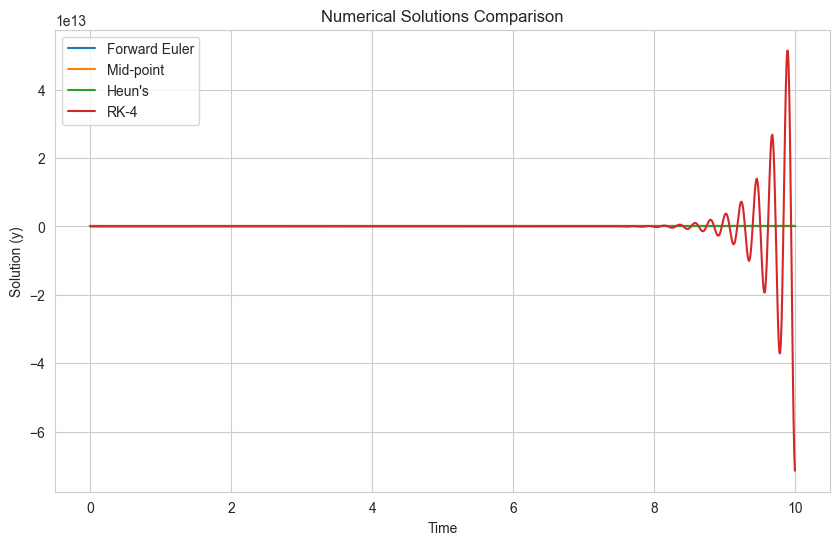

In [1]:
import numpy as np
import matplotlib.pyplot as plt

m = 10
k = 90
c = 10
y_0 = 0
y_prime_0 = 2
T = 10
num_steps = 1000

def f(t, y, y_prime):
    return -c * y_prime / m - k * y / m

def forward_euler(f, y_0, y_prime_0, T, num_steps):
    h = T / num_steps
    t_values = np.linspace(0, T, num_steps)
    y_values = np.zeros(num_steps)
    y_prime_values = np.zeros(num_steps)

    y_values[0] = y_0
    y_prime_values[0] = y_prime_0

    for i in range(1, num_steps):
        y_prime_values[i] = y_prime_values[i - 1] + h * f(t_values[i - 1], y_values[i - 1], y_prime_values[i - 1])
        y_values[i] = y_values[i - 1] + h * y_prime_values[i - 1]

    return t_values, y_values

def midpoint_method(f, y_0, y_prime_0, T, num_steps):
    h = T / num_steps
    t_values = np.linspace(0, T, num_steps)
    y_values = np.zeros(num_steps)
    y_prime_values = np.zeros(num_steps)

    y_values[0] = y_0
    y_prime_values[0] = y_prime_0

    for i in range(1, num_steps):
        y_prime_mid = y_prime_values[i - 1] + h / 2 * f(t_values[i - 1], y_values[i - 1], y_prime_values[i - 1])
        y_mid = y_values[i - 1] + h / 2 * y_prime_values[i - 1]

        y_prime_values[i] = y_prime_values[i - 1] + h * f(t_values[i - 1] + h / 2, y_mid, y_prime_mid)
        y_values[i] = y_values[i - 1] + h * y_prime_mid

    return t_values, y_values

def heun_method(f, y_0, y_prime_0, T, num_steps):
    h = T / num_steps
    t_values = np.linspace(0, T, num_steps)
    y_values = np.zeros(num_steps)
    y_prime_values = np.zeros(num_steps)

    y_values[0] = y_0
    y_prime_values[0] = y_prime_0

    for i in range(1, num_steps):
        k1 = f(t_values[i - 1], y_values[i - 1], y_prime_values[i - 1])
        k2 = f(t_values[i - 1] + h, y_values[i - 1] + h * y_prime_values[i - 1], y_prime_values[i - 1] + h * k1)
        
        y_prime_values[i] = y_prime_values[i - 1] + h / 2 * (k1 + k2)
        y_values[i] = y_values[i - 1] + h / 2 * (y_prime_values[i - 1] + y_prime_values[i])

    return t_values, y_values

def rk4_method(f, y_0, y_prime_0, T, num_steps):
    h = T / num_steps
    t_values = np.linspace(0, T, num_steps)
    y_values = np.zeros(num_steps)
    y_prime_values = np.zeros(num_steps)

    y_values[0] = y_0
    y_prime_values[0] = y_prime_0

    for i in range(1, num_steps):
        k1 = h * f(t_values[i - 1], y_values[i - 1], y_prime_values[i - 1])
        k2 = h * f(t_values[i - 1] + h / 2, y_values[i - 1] + k1 / 2, y_prime_values[i - 1] + k1 / 2)
        k3 = h * f(t_values[i - 1] + h / 2, y_values[i - 1] + k2 / 2, y_prime_values[i - 1] + k2 / 2)
        k4 = h * f(t_values[i - 1] + h, y_values[i - 1] + k3, y_prime_values[i - 1] + k3)

        y_prime_values[i] = y_prime_values[i - 1] + 1 / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        y_values[i] = y_values[i - 1] + 1 / 6 * (y_prime_values[i - 1] + 2 * y_prime_values[i - 1] + 2 * y_prime_values[i - 1] + y_prime_values[i])

    return t_values, y_values

t_fe, y_fe = forward_euler(f, y_0, y_prime_0, T, num_steps)
t_mp, y_mp = midpoint_method(f, y_0, y_prime_0, T, num_steps)
t_heun, y_heun = heun_method(f, y_0, y_prime_0, T, num_steps)
t_rk4, y_rk4 = rk4_method(f, y_0, y_prime_0, T, num_steps)

plt.figure(figsize=(10, 6))

plt.plot(t_fe, y_fe, label='Forward Euler')
plt.plot(t_mp, y_mp, label='Mid-point')
plt.plot(t_heun, y_heun, label="Heun's")
plt.plot(t_rk4, y_rk4, label='RK-4')

plt.title('Numerical Solutions Comparison')
plt.xlabel('Time')
plt.ylabel('Solution (y)')
plt.legend()
plt.grid(True)
plt.show()


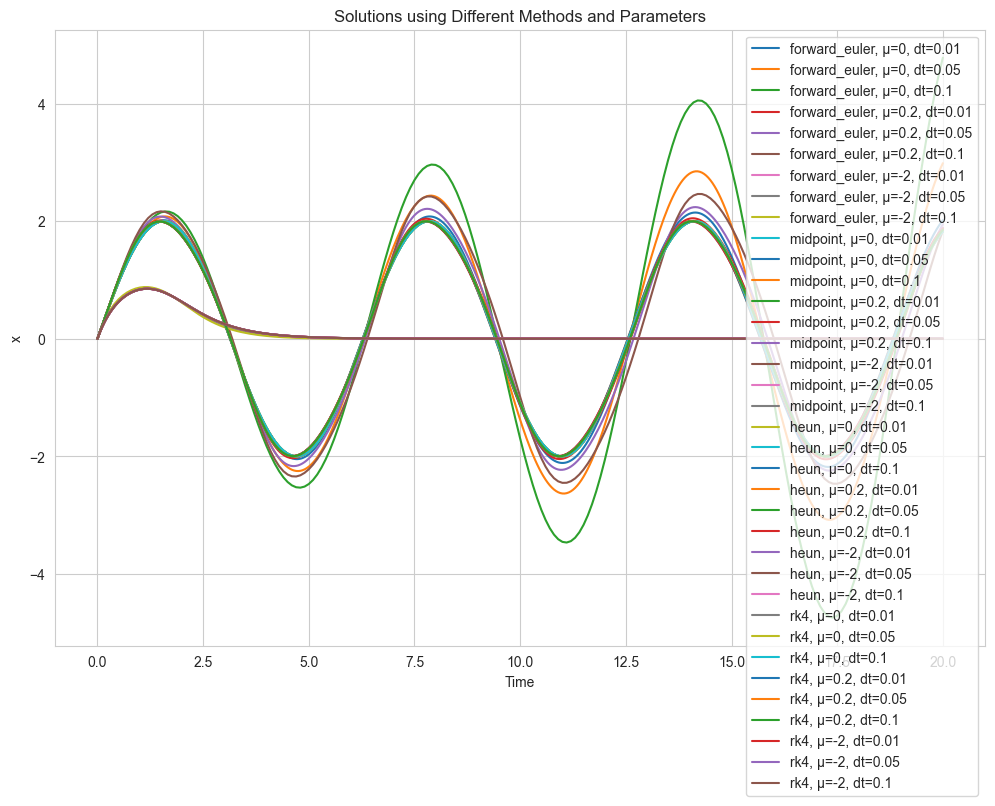

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def forward_euler(f, x0, v0, t0, tf, dt, mu):
    num_steps = int((tf - t0) / dt)
    t = np.linspace(t0, tf, num_steps + 1)
    x = np.zeros(num_steps + 1)
    v = np.zeros(num_steps + 1)
    x[0], v[0] = x0, v0

    for i in range(num_steps):
        x[i + 1] = x[i] + dt * v[i]
        v[i + 1] = v[i] + dt * f(x[i], v[i], t[i], mu)

    return t, x, v

def midpoint(f, x0, v0, t0, tf, dt, mu):
    num_steps = int((tf - t0) / dt)
    t = np.linspace(t0, tf, num_steps + 1)
    x = np.zeros(num_steps + 1)
    v = np.zeros(num_steps + 1)
    x[0], v[0] = x0, v0

    for i in range(num_steps):
        x_half = x[i] + 0.5 * dt * v[i]
        v_half = v[i] + 0.5 * dt * f(x[i], v[i], t[i], mu)
        x[i + 1] = x[i] + dt * v_half
        v[i + 1] = v[i] + dt * f(x_half, v_half, t[i] + 0.5 * dt, mu)

    return t, x, v

def heun(f, x0, v0, t0, tf, dt, mu):
    num_steps = int((tf - t0) / dt)
    t = np.linspace(t0, tf, num_steps + 1)
    x = np.zeros(num_steps + 1)
    v = np.zeros(num_steps + 1)
    x[0], v[0] = x0, v0

    for i in range(num_steps):
        k1_x = dt * v[i]
        k1_v = dt * f(x[i], v[i], t[i], mu)
        k2_x = dt * (v[i] + k1_v)
        k2_v = dt * f(x[i] + k1_x, v[i] + k1_v, t[i] + dt, mu)
        x[i + 1] = x[i] + 0.5 * (k1_x + k2_x)
        v[i + 1] = v[i] + 0.5 * (k1_v + k2_v)

    return t, x, v

def rk4(f, x0, v0, t0, tf, dt, mu):
    num_steps = int((tf - t0) / dt)
    t = np.linspace(t0, tf, num_steps + 1)
    x = np.zeros(num_steps + 1)
    v = np.zeros(num_steps + 1)
    x[0], v[0] = x0, v0

    for i in range(num_steps):
        k1_x = dt * v[i]
        k1_v = dt * f(x[i], v[i], t[i], mu)
        k2_x = dt * (v[i] + 0.5 * k1_v)
        k2_v = dt * f(x[i] + 0.5 * k1_x, v[i] + 0.5 * k1_v, t[i] + 0.5 * dt, mu)
        k3_x = dt * (v[i] + 0.5 * k2_v)
        k3_v = dt * f(x[i] + 0.5 * k2_x, v[i] + 0.5 * k2_v, t[i] + 0.5 * dt, mu)
        k4_x = dt * (v[i] + k3_v)
        k4_v = dt * f(x[i] + k3_x, v[i] + k3_v, t[i] + dt, mu)
        x[i + 1] = x[i] + (k1_x + 2 * k2_x + 2 * k3_x + k4_x) / 6
        v[i + 1] = v[i] + (k1_v + 2 * k2_v + 2 * k3_v + k4_v) / 6

    return t, x, v

def f(x, v, t, mu):
    return -mu * (x**2 - 1) * v - x

x0 = 0
v0 = 2
t0 = 0
tf = 20
dt_values = [0.01, 0.05, 0.1]
mu_values = [0, 0.2, -2]

plt.figure(figsize=(12, 8))

for method in [forward_euler, midpoint, heun, rk4]:
    for mu in mu_values:
        for dt in dt_values:
            t, x, v = method(f, x0, v0, t0, tf, dt, mu)
            plt.plot(t, x, label=f'{method.__name__}, μ={mu}, dt={dt}')

plt.xlabel('Time')
plt.ylabel('x')
plt.title('Solutions using Different Methods and Parameters')
plt.legend()
plt.grid(True)
plt.show()


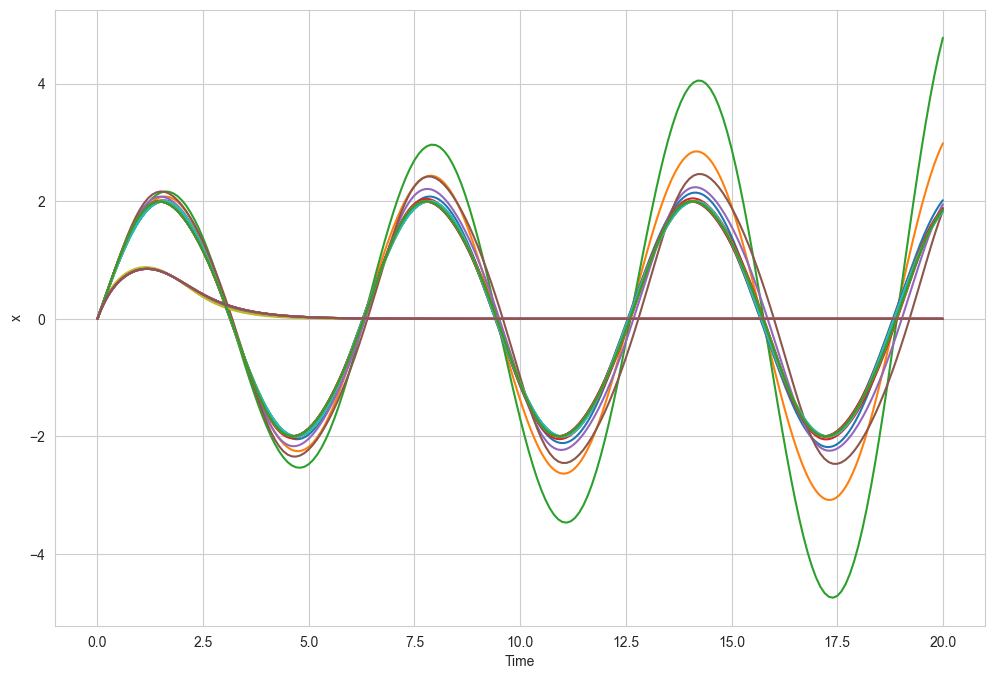

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def forward_euler(f, x0, v0, t0, tf, dt, mu):
    num_steps = int((tf - t0) / dt)
    t = np.linspace(t0, tf, num_steps + 1)
    x = np.zeros(num_steps + 1)
    v = np.zeros(num_steps + 1)
    x[0], v[0] = x0, v0

    for i in range(num_steps):
        x[i + 1] = x[i] + dt * v[i]
        v[i + 1] = v[i] + dt * f(x[i], v[i], t[i], mu)

    return t, x, v

def midpoint(f, x0, v0, t0, tf, dt, mu):
    num_steps = int((tf - t0) / dt)
    t = np.linspace(t0, tf, num_steps + 1)
    x = np.zeros(num_steps + 1)
    v = np.zeros(num_steps + 1)
    x[0], v[0] = x0, v0

    for i in range(num_steps):
        x_half = x[i] + 0.5 * dt * v[i]
        v_half = v[i] + 0.5 * dt * f(x[i], v[i], t[i], mu)
        x[i + 1] = x[i] + dt * v_half
        v[i + 1] = v[i] + dt * f(x_half, v_half, t[i] + 0.5 * dt, mu)

    return t, x, v

def heun(f, x0, v0, t0, tf, dt, mu):
    num_steps = int((tf - t0) / dt)
    t = np.linspace(t0, tf, num_steps + 1)
    x = np.zeros(num_steps + 1)
    v = np.zeros(num_steps + 1)
    x[0], v[0] = x0, v0

    for i in range(num_steps):
        k1_x = dt * v[i]
        k1_v = dt * f(x[i], v[i], t[i], mu)
        k2_x = dt * (v[i] + k1_v)
        k2_v = dt * f(x[i] + k1_x, v[i] + k1_v, t[i] + dt, mu)
        x[i + 1] = x[i] + 0.5 * (k1_x + k2_x)
        v[i + 1] = v[i] + 0.5 * (k1_v + k2_v)

    return t, x, v

def rk4(f, x0, v0, t0, tf, dt, mu):
    num_steps = int((tf - t0) / dt)
    t = np.linspace(t0, tf, num_steps + 1)
    x = np.zeros(num_steps + 1)
    v = np.zeros(num_steps + 1)
    x[0], v[0] = x0, v0

    for i in range(num_steps):
        k1_x = dt * v[i]
        k1_v = dt * f(x[i], v[i], t[i], mu)
        k2_x = dt * (v[i] + 0.5 * k1_v)
        k2_v = dt * f(x[i] + 0.5 * k1_x, v[i] + 0.5 * k1_v, t[i] + 0.5 * dt, mu)
        k3_x = dt * (v[i] + 0.5 * k2_v)
        k3_v = dt * f(x[i] + 0.5 * k2_x, v[i] + 0.5 * k2_v, t[i] + 0.5 * dt, mu)
        k4_x = dt * (v[i] + k3_v)
        k4_v = dt * f(x[i] + k3_x, v[i] + k3_v, t[i] + dt, mu)
        x[i + 1] = x[i] + (k1_x + 2 * k2_x + 2 * k3_x + k4_x) / 6
        v[i + 1] = v[i] + (k1_v + 2 * k2_v + 2 * k3_v + k4_v) / 6

    return t, x, v

def f(x, v, t, mu):
    return -mu * (x**2 - 1) * v - x

x0 = 0
v0 = 2
t0 = 0
tf = 20
dt_values = [0.01, 0.05, 0.1]
mu_values = [0, 0.2, -2]

plt.figure(figsize=(12, 8))

for method in [forward_euler, midpoint, heun, rk4]:
    for mu in mu_values:
        for dt in dt_values:
            t, x, v = method(f, x0, v0, t0, tf, dt, mu)
            plt.plot(t, x)

plt.xlabel('Time')
plt.ylabel('x')
plt.show()
